In [17]:
import os
from skimage import data, color, exposure
from skimage.feature import  hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import glob
import cv2 as cv

In [18]:
images_test_pos = []
for img_path in glob.glob('Test/pos/*.*'):
    images_test_pos.append(imread(img_path))
    
images_train_pos = []
for img_path in glob.glob('Train/pos/*.*'):
    images_train_pos.append(imread(img_path))
    
images_test_neg = []
for img_path in glob.glob('Test/neg/*.*'):
    images_test_neg.append(imread(img_path,1))

images_train_neg = []
for img_path in glob.glob('Train/neg/*.*'):
    images_train_neg.append(imread(img_path,1))
    
img_train_pos_resize = []
img_train_neg_resize = []
for pos_img_file in images_train_pos:
    img_train_pos_resize.append(cv.resize(pos_img_file,(64,128)))
for neg_img_file in images_train_neg:
    img_train_neg_resize.append(cv.resize(neg_img_file,(64,128)))
    
    



In [19]:
from skimage import feature
from skimage import exposure
from tqdm.notebook import tqdm

train_data = []
train_img_count=len(img_train_pos_resize)

def compute_HOG(image):
    (H1,hogImage1)=feature.hog(image,orientations=3,
                              pixels_per_cell=(8,8), cells_per_block=(2,2),transform_sqrt=True,
                              block_norm = 'L1', visualize=True)
    return(H1,hogImage1)

train_lbl = []

for i in tqdm(range(0,train_img_count)):
    (h_vector,h_image)=compute_HOG(img_train_pos_resize[i])
    train_data.append(h_vector)
    train_lbl.append(1)
    
    

    
train_img_count=len(img_train_pos_resize)
for i in tqdm(range(0,train_img_count)):
    (h_vector,h_image)= compute_HOG(img_train_pos_resize[i])
    train_data.append(h_vector)
    train_lbl.append(0)
total_length=len(img_train_pos_resize)+len(img_train_pos_resize)
train_label=train_lbl[0:total_length]



  0%|          | 0/2416 [00:00<?, ?it/s]

  0%|          | 0/2416 [00:00<?, ?it/s]

In [20]:
from sklearn.svm import LinearSVC
modelSVC = LinearSVC(max_iter=3000)
modelSVC.fit(train_data,train_label)
print("SVC Training has been Completed")


img_test_pos_resize=[]
img_test_neg_resize=[]
for pos_img_file in images_test_pos:
    img_test_pos_resize.append(cv.resize(pos_img_file,(64,128)))
    
for neg_img_file in images_test_neg:
    img_test_neg_resize.append(cv.resize(pos_img_file,(64,128)))
print(len(img_test_pos_resize))

SVC Training Completed
1132


  0%|          | 0/1132 [00:00<?, ?it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

Prediction Completed
Comparing predicted and Actual Labels
[0 1 0 1 0 1 0 1 0 0]
[1 1 1 1 1 1 1 1 1 1]
161
0
453
971
1585
Accuracy: 0.38738170347003154
0.2758620689655173


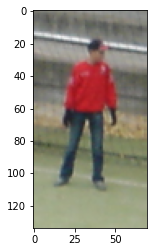

Actual Label: 1
SVM Predicted Label 0


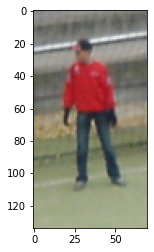

Actual Label: 1
SVM Predicted Label 1


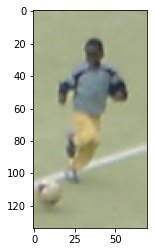

Actual Label: 1
SVM Predicted Label 0


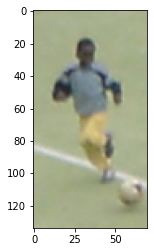

Actual Label: 1
SVM Predicted Label 1


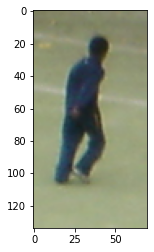

Actual Label: 1
SVM Predicted Label 0


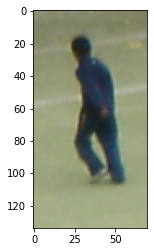

Actual Label: 1
SVM Predicted Label 1


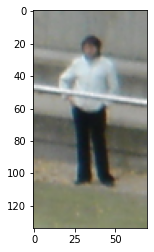

Actual Label: 1
SVM Predicted Label 0


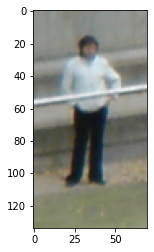

Actual Label: 1
SVM Predicted Label 1


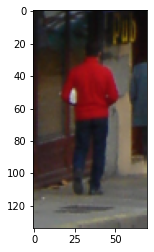

Actual Label: 1
SVM Predicted Label 0


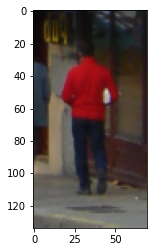

Actual Label: 1
SVM Predicted Label 0


In [21]:
test_data=[]
test_lbl=[]
test_img_count=len(img_test_pos_resize)

for i in tqdm(range(0,test_img_count)):
    (h_vector , h_image)=compute_HOG(img_test_pos_resize[i])
    test_data.append(h_vector)
    test_lbl.append(1)
    
test_img_count=len(img_test_neg_resize)

for i in tqdm(range(0,test_img_count)):
    (h_vector, h_image)= compute_HOG(img_test_neg_resize[i])
    test_data.append(h_vector)
    test_lbl.append(0)
    
total_length=len(img_train_pos_resize)+len(img_test_neg_resize)
test_label=test_lbl[0:total_length]

predicted_labels= modelSVC.predict(test_data)
print("Prediction Completed")
print("Comparing predicted and Actual Labels")
print(predicted_labels[0:10])
print(np.array(test_label[0:10]))


true_positive = 0
false_positive = 0
true_negitive = 0
false_negitive = 0
for a in range(len(test_label)):
    if(predicted_labels[a]==1 and test_label[a]==1):
        true_positive+=1
    if(predicted_labels[a]==1 and test_label[a]==0):
        false_positive+=1
    if(predicted_labels[a]==0 and test_label[a]==0):
        true_negitive+=1
    if(predicted_labels[a]==0 and test_label[a]==1):
        false_negitive+=1
        
print(true_positive)
print(false_positive)
print(true_negitive)
print(false_negitive)
print(len(predicted_labels))

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_label[0:3000],predicted_labels[0:3000]))

from sklearn.metrics import f1_score
print(f1_score(test_label[0:100],predicted_labels[0:100]))

for i in range(10):
    plt.imshow(images_test_pos[i])
    plt.show()
    print("Actual Label:", test_label[i] )
    print("SVM Predicted Label", predicted_labels[i])
    
    


In [5]:
    
    
  
 import os
from skimage import data, color, exposure
from skimage.feature import  hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import glob
import cv2 as cv

images_test_pos = []
for img_path in glob.glob('Test/pos/*.*'):
    images_test_pos.append(imread(img_path))
    
images_train_pos = []
for img_path in glob.glob('Train/pos/*.*'):
    images_train_pos.append(imread(img_path))
    
images_test_neg = []
for img_path in glob.glob('Test/neg/*.*'):
    images_test_neg.append(imread(img_path,1))

images_train_neg = []
for img_path in glob.glob('Train/neg/*.*'):
    images_train_neg.append(imread(img_path,1))
    
img_train_pos_resize = []
img_train_neg_resize = []
for pos_img_file in images_train_pos:
    img_train_pos_resize.append(cv.resize(pos_img_file,(64,128)))
for neg_img_file in images_train_neg:
    img_train_neg_resize.append(cv.resize(neg_img_file,(64,128)))
    
    



In [6]:
from skimage import feature
from skimage import exposure
from tqdm.notebook import tqdm

train_data = []
train_img_count=len(img_train_pos_resize)

def compute_HOG(image):
    (H1,hogImage1)=feature.hog(image,orientations=3,
                              pixels_per_cell=(8,8), cells_per_block=(2,2),transform_sqrt=True,
                              block_norm = 'L1', visualize=True)
    return(H1,hogImage1)

train_lbl = []

for i in tqdm(range(0,train_img_count)):
    (h_vector,h_image)=compute_HOG(img_train_pos_resize[i])
    train_data.append(h_vector)
    train_lbl.append(1)
    
train_img_count=len(img_train_pos_resize)
for i in tqdm(range(0,train_img_count)):
    (h_vector,h_image)= compute_HOG(img_train_pos_resize[i])
    train_data.append(h_vector)
    train_lbl.append(0)
total_length=len(img_train_pos_resize)+len(img_train_pos_resize)
train_label=train_lbl[0:total_length]




  0%|          | 0/2416 [00:00<?, ?it/s]

  0%|          | 0/2416 [00:00<?, ?it/s]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(train_data,train_label)
print("Random Forest Regressor Training Completed")

img_test_pos_resize=[]
img_test_neg_resize=[]
for pos_img_file in images_test_pos:
    img_test_pos_resize.append(cv.resize(pos_img_file,(64,128)))
    
for neg_img_file in images_test_neg:
    img_test_neg_resize.append(cv.resize(pos_img_file,(64,128)))
    
print(len(img_test_pos_resize))


test_data=[]
test_lbl=[]
test_img_count=len(img_test_pos_resize)

for i in tqdm(range(0,test_img_count)):
    (h_vector , h_image)=compute_HOG(img_test_pos_resize[i])
    test_data.append(h_vector)
    test_lbl.append(1)
    
test_img_count=len(img_test_neg_resize)

for i in tqdm(range(0,test_img_count)):
    (h_vector, h_image)= compute_HOG(img_test_neg_resize[i])
    test_data.append(h_vector)
    test_lbl.append(0)
    
total_length=len(img_train_pos_resize)+len(img_test_neg_resize)
test_label=test_lbl[0:total_length]


predicted_labels= modelSVC.predict(test_data)
print("Prediction has been Completed")
print("Comparing predicted and Actual Labels")
print(predicted_labels[0:10])
print(np.array(test_label[0:10]))


true_positive = 0
false_positive = 0
true_negitive = 0
false_negitive = 0
for a in range(len(test_label)):
    if(predicted_labels[a]==1 and test_label[a]==1):
        true_positive+=1
    if(predicted_labels[a]==1 and test_label[a]==0):
        false_positive+=1
    if(predicted_labels[a]==0 and test_label[a]==0):
        true_negitive+=1
    if(predicted_labels[a]==0 and test_label[a]==1):
        false_negitive+=1
        
print(true_positive)
print(false_positive)
print(true_negitive)
print(false_negitive)
print(len(predicted_labels))

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_label[0:3000],predicted_labels[0:3000]))

from sklearn.metrics import f1_score
print(f1_score(test_label[0:100],predicted_labels[0:100]))   
    